In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class Particle:
   
    def __init__(self, dims, p_range, v_range):
        
        #dims = number of dimensions
        #p= position of the particle in the dimentional space
        #v = velocity of the particle in the dimensional space
        #p_range = range of dimensions 
        #v_range = range of velocities
        
        #let the position and velocity of a praticle be randomly selected from uniform distribution
        self.p = np.random.uniform(p_range[0], p_range[1], (dims, ))
        self.v = np.random.uniform(v_range[0], v_range[1], (dims, )) 
        
        #the best position for any particle can be positive infinity
        self.pbest = float('inf') #-1 #np.inf
        
        #define particles best position based on specified dimensions
        self.pbestpos = np.zeros((dims, ))

In [5]:
class Swarm:
    
    def __init__(self, particle_no, dims, p_range, v_range, alpha_range, component):
        
        #particle_no = number of particles
        #dims = dimensions
        #p_range = range of dimensions 
        #v_range = range of velocities
        #alpha_range = inertia weight range
        #components = cognetive and social components
        
        
        #define the swarm with praticles from Class Particle
        self.p = np.array([Particle(dims, p_range, v_range) for i in range(particle_no)])
        
        #define global best as infinity
        self.gbest = float('inf')  #np.inf
        
        #define global best poition
        self.gbestpos = np.zeros((dims, ))
        
        self.p_range = p_range
        self.v_range = v_range
        
        self.alpha_range = alpha_range
        
        #components
        self.component0 = component[0]
        self.component1 = component[1]
        self.dims = dims
        
        
        
    def drawGraph(self):
        plt.plot(range(100), self.mserror, color='black')
       
    def optimize(self, function, input_X, output_Y,  print_step,  iter):
        informants = 6 
        for i in range(iter):
            for particle in self.p:
                fitness = function(input_X, output_Y, particle.p)

                #select the particles best position
                if fitness.any() < particle.pbest:
                    particle.pbest = fitness.any()
                    particle.pbestpos = particle.p.copy()
                    
            for i in range(informants):
                for particle in self.p:          
                
                #select the global best position    
                 if fitness.any()< self.gbest:
                    self.gbest = fitness.any()
                    self.gbestpos = particle.p.copy()
                    

            for particle in self.p:
               
                alpha = np.random.uniform(self.alpha_range[0], self.alpha_range[1], 1)[0]
                
                #velocity update formula
                particle.v = alpha * particle.v + (self.component0 * np.random.uniform(0.0, 1.0, (self.dims, )) * \
                (particle.pbestpos - particle.p)) + (self.component1 * np.random.uniform(0.0, 1.0, (self.dims, )) \
                * (self.gbestpos - particle.p))
                epsilon = 0.2
                #particle.v = particle.v.clip(min=self.v_range[0], max=self.v_range[1])
                particle.p = particle.p + epsilon * particle.v
                #print(particle.p)
                #particle.x = particle.x.clip(min=self.x_range[0], max=self.x_range[1])
                    
            #if i % print_step == 0:
               # print('iteration#: ', i+1,  ' loss: ', fitness)

        #print("global best loss: ", self.gbest)
        
    def get_best_solution(self):
    
        return self.gbestpos   


In [6]:
import csv
with open("X_linear.csv", 'r') as f:
    Xin = list(csv.reader(f, delimiter=";"))
import numpy as np
Xin = np.array(Xin[1:], dtype=np.float)
#print(Xin)
#print(Xin.shape)

In [7]:
#input_X = layer1_input.values
input_X= Xin
#input_X

In [8]:
print(input_X.shape)

(100, 1)


In [9]:
output_Y = np.zeros(shape=(100,1))

In [10]:
perfect_predict_Y = np.full((100, 1), 1, dtype=int)

In [11]:
def linear(input_X):
    output_Y = input_X
    return output_Y

In [12]:
output_Y = linear(input_X)

In [13]:
#ANN architecture
#define no of nodes in each layer..
Input = 1
Hidden = 200
Output = 1

In [14]:
sig_Y = sigmoid(sigmoid(input_X))

NameError: name 'sigmoid' is not defined

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [16]:
def linear1(input_X):
       return input_X

In [17]:
df = pd.DataFrame(columns=['MSE', 'Output_Y', 'Predicted_Y'])
print(df)

Empty DataFrame
Columns: [MSE, Output_Y, Predicted_Y]
Index: []


In [18]:
MSE = []

def forward_pass(input_X, output_Y, W):

     
    if isinstance(W, Particle):
        W = W.p

    w1 = W[0 : Input * Hidden].reshape((Input, Hidden))

    b1 = W[Input * Hidden:(Input * Hidden) + Hidden].reshape((Hidden, ))
    w2 = W[(Input * Hidden) + Hidden:(Input * Hidden) + Hidden +\
        (Hidden * Output)].reshape((Hidden, Output))
    
    b2 = W[(Input * Hidden) + Hidden + (Hidden * Output): (Input *\
        Hidden) + Hidden + (Hidden * Output) + Output].reshape((Output, ))


    z1 = np.dot(input_X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = sigmoid(z2)
    
       
    mserror1 = (np.power((output_from_outputlayer - output_Y), 2)) # **2
    mserror = (mserror1.sum()/100)
    MSE.append(mserror)
    print(mserror)
    
    
    
    return mserror
   

In [19]:
def pass_information(input_X, W):


    if isinstance(W, Particle):
        W = W.p

    w1 = W[0 : Input * Hidden].reshape((Input, Hidden))

    b1 = W[Input * Hidden:(Input * Hidden) + Hidden].reshape((Hidden, ))
    w2 = W[(Input * Hidden) + Hidden:(Input * Hidden) + Hidden +\
        (Hidden * Output)].reshape((Hidden, Output))
    
    b2 = W[(Input * Hidden) + Hidden + (Hidden * Output): (Input *\
        Hidden) + Hidden + (Hidden * Output) + Output].reshape((Output, ))


    z1 = np.dot(input_X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = sigmoid(z2)
    
       
    mserror1 = (np.power((output_from_outputlayer - output_Y), 2))
    mserror = (mserror1.sum()/100)
   
   # df = pd.DataFrame(columns=['MSE'])
    #df2 = pd.DataFrame(columns=cols, index=range(2))
    
   # df = df.append({'MSE': mserror}, ignore_index=True)
        
    
    
    #df = pd.DataFrame(columns=['MSE'])

    #df = df.append({'MSE': mserror}, ignore_index=True)
    #print(df)
    
    return df
   

In [20]:
def predict(input_X, W):
  
    w1 = W[0 : Input * Hidden].reshape((Input, Hidden))

    b1 = W[Input * Hidden:(Input * Hidden) + Hidden].reshape((Hidden, ))
    w2 = W[(Input * Hidden) + Hidden:(Input * Hidden) + Hidden +\
        (Hidden * Output)].reshape((Hidden, Output))
    
    b2 = W[(Input * Hidden) + Hidden + (Hidden * Output): (Input *\
        Hidden) + Hidden + (Hidden * Output) + Output].reshape((Output, ))

    z1 = np.dot(input_X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    output_from_outputlayer = sigmoid(z2)
    
    comparison = np.round(sig_Y, 2) == np.round(output_from_outputlayer, 2)
   # np.sum(np.round(sig_Y, 2) == np.round(output_from_outputlayer, 2))
    #print((np.round(sig_Y, 2)  == np.round(output_from_outputlayer, 2)).sum())
    #print(comparison.sum())
    
    
    #Y_pred = np.argmax(output_from_outputlayer, axis=1)
   
    #print(output_from_outputlayer.shape)
    Y_pred = comparison.sum()
    return Y_pred

In [21]:
def get_accuracy(output_Y, Y_pred):
    return (Y_pred)*100/100

In [22]:
if __name__ == '__main__':
    no_solution = 1
 
    dims = (Input * Hidden) + Hidden + (Hidden * Output) + Output
    w_range = (-1, 1)
    lr_range = (0.0, 0.5)
    alpha_range = (0.8, 0.9)  
    components = (3, 1)  
    #arr = np.array(output_from_outputlayer)
    s = Swarm(no_solution, dims, w_range, lr_range, alpha_range, components)
    
    iterations = 200
    s.optimize(forward_pass, input_X, output_Y, 200,iterations)
    
    W = s.get_best_solution()
    Y_pred = predict(input_X, W)
    accuracy = get_accuracy(output_Y, Y_pred)
    Average_accuracy = accuracy.sum()/iterations
  
    
    #for i in range(iterations):
        #pass_info = pass_information(input_X, W)
       # print(pass_info)
    
    
    
    #df2 = pd.DataFrame(columns=['Accuracy', 'Average Solution Accuracy'])
    #df2 = df2.append({'Accuracy': accuracy, 'Average Solution Accuracy': Average_accuracy}, ignore_index=True)
   # print(df2)
    
    print("Accuracy: %.3f"% Average_accuracy)


1.0307914720847366
1.3429713395715688
1.351462665990063
1.349585032056352
1.307983073304338
0.7995232394913455
0.33748048630488425
0.31730604969733794
0.3339733704973111
0.731743297576211
1.212902763996178
1.3149236552840415
1.3187984755696578
1.2678262136604272
1.0629437097389751
0.686317168337748
0.5003232066139219
0.5415068564714454
0.7813236848771028
1.0797289428057677
1.2129086054681715
1.2462723478783504
1.2167977519366495
1.1130743540474202
0.9434126680224167
0.8052025491930896
0.7852451650998663
0.8636593285074441
0.9938148037519464
1.0969084505469497
1.1469914670377725
1.1459129385768263
1.102378151990103
1.0219263816065873
0.9468951447151319
0.9092681310443431
0.9272959784311091
0.98600543843246
1.0488311716804022
1.088609541563401
1.1005776918674748
1.0823799199168136
1.0451429775787349
1.0069174809928758
0.9816967146762109
0.9813128975810603
1.0008422318176304
1.0284828622400697
1.0516260172969978
1.0611190897315759
1.057531056849558
1.0427862263714807
1.02496320183874
1.01

NameError: name 'sig_Y' is not defined

<ipython-input-23-2c40b0ee455c>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  graph_ms.show()


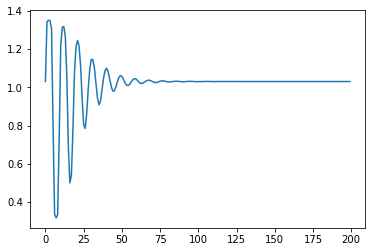

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
graph_ms = plt.figure()
g = graph_ms.add_subplot()
graph_ms.show()
g.plot(MSE)

In [40]:
len(MSE)

200

In [38]:
#define DataFrame
df = pd.DataFrame(range(iterations))

#add MSE array
df['MSE'] = MSE

# add data to data frame
#df[''] = perfect_predict_Y

#add more to data frame 
df.columns = ['Iterations', 'Mean Squared Error']
df.set_index('Iterations')

# save data frame to csv
df.to_csv('MSE.csv')

ValueError: Shape of passed values is (200, 1), indices imply (200, 2)